## Task a) Number of Unique People per Cluster
To compute the number of unique people in each cluster, which is represented by a unique trace ID across all 5 datasets.

In [7]:
import pandas as pd

df_f0_f1 = pd.read_csv('../data/f0_f1.csv')
df_f1_f2 = pd.read_csv('../data/f1_f2.csv')
df_f2_f3 = pd.read_csv('../data/f2_f3.csv')
df_f3_f4 = pd.read_csv('../data/f3_f4.csv')
df_f4_f5 = pd.read_csv('../data/f4_f5.csv')

print(df_f0_f1.head())
print(df_f0_f1.tail())

                  f0                 f1                 trace_id
0  PERSON_0000000016  PERSON_0000000914  TRACE_PERSON_0000000016
1  PERSON_0000000019  PERSON_0000000431  TRACE_PERSON_0000000019
2  PERSON_0000000130  PERSON_0000000318  TRACE_PERSON_0000000130
3  PERSON_0000000282  PERSON_0000000539  TRACE_PERSON_0000000282
4  PERSON_0000000296  PERSON_0000000752  TRACE_PERSON_0000000296
                     f0                 f1                 trace_id
1440  PERSON_0000000535  PERSON_0000000459  TRACE_PERSON_0000000535
1441  PERSON_0000000616  PERSON_0000000690  TRACE_PERSON_0000000616
1442  PERSON_0000000713  PERSON_0000000111  TRACE_PERSON_0000000713
1443  PERSON_0000000758  PERSON_0000000024  TRACE_PERSON_0000000758
1444  PERSON_0000000945  PERSON_0000000405  TRACE_PERSON_0000000945


In [8]:
print(df_f0_f1.shape)
print(df_f1_f2.shape)
print(df_f2_f3.shape)
print(df_f3_f4.shape)
print(df_f4_f5.shape)

(1445, 3)
(910, 3)
(521, 3)
(264, 3)
(134, 3)


In [9]:
df_f5 = df_f4_f5[['trace_id','f5']].sort_values('trace_id') 
df_f5 # extracting f5 values

,trace_id,f5
13,TRACE_PERSON_0000000003,PERSON_0000000138
68,TRACE_PERSON_0000000003,PERSON_0000000115
57,TRACE_PERSON_0000000005,PERSON_0000000195
106,TRACE_PERSON_0000000084,PERSON_0000000595
51,TRACE_PERSON_0000000084,PERSON_0000000595
...,...,...
34,TRACE_PERSON_0000000958,PERSON_0000000067
38,TRACE_PERSON_0000000958,PERSON_0000000601
82,TRACE_PERSON_0000000958,PERSON_0000000508
93,TRACE_PERSON_0000000958,PERSON_0000000991


In [10]:
df_f5.duplicated().sum()

20

In [11]:
df_f5_nodupli = df_f5.drop_duplicates()
df_f5_nodupli.shape # unique f5 based on traceID 

(114, 2)

In [12]:
#extracting f4 data
df_f4_1 = df_f3_f4[['trace_id','f4']].sort_values('trace_id') 
df_f4_2 = df_f4_f5[['trace_id','f4']].sort_values('trace_id') 

In [13]:
# check the dimension
print(df_f4_1.shape)
print(df_f4_2.shape)

(264, 2)
(134, 2)


In [14]:
# dropping duplicates
print(df_f4_1.duplicated().sum())
print(df_f4_2.duplicated().sum())

23
60


In [15]:
df_f4_1_nodupli = df_f4_1.drop_duplicates()
df_f4_2_nodupli = df_f4_2.drop_duplicates()

# verify using dimension
print(df_f4_1_nodupli.shape)
print(df_f4_2_nodupli.shape)

(241, 2)
(74, 2)


In [16]:
# merging to get full F4 data
df_f4_nodupli = df_f4_1_nodupli.merge(df_f4_2_nodupli, left_on=['trace_id','f4'], right_on=['trace_id','f4'], how='outer')
df_f4_nodupli.duplicated().sum() # check

0

In [17]:
#extracting f3 data
df_f3_1 = df_f2_f3[['trace_id','f3']].sort_values('trace_id') 
df_f3_2 = df_f3_f4[['trace_id','f3']].sort_values('trace_id') 

In [18]:
# check the dimension
print(df_f3_1.shape)
print(df_f3_2.shape)

(521, 2)
(264, 2)


In [19]:
# dropping duplicates
print(df_f3_1.duplicated().sum())
print(df_f3_2.duplicated().sum())

53
116


In [20]:
df_f3_1_nodupli = df_f3_1.drop_duplicates()
df_f3_2_nodupli = df_f3_2.drop_duplicates()

# verify using dimension
print(df_f3_1_nodupli.shape)
print(df_f3_2_nodupli.shape)

(468, 2)
(148, 2)


In [21]:
# merging to get full F3 data
df_f3_nodupli = df_f3_1_nodupli.merge(df_f3_2_nodupli, left_on=['trace_id','f3'], right_on=['trace_id','f3'], how='outer')
df_f3_nodupli.duplicated().sum() # validate

0

In [22]:
#extracting f2 data
df_f2_1 = df_f1_f2[['trace_id','f2']].sort_values('trace_id') 
df_f2_2 = df_f2_f3[['trace_id','f2']].sort_values('trace_id') 

In [23]:
# check the dimension
print(df_f2_1.shape)
print(df_f2_2.shape)

(910, 2)
(521, 2)


In [24]:
# drop duplicates
print(df_f2_1.duplicated().sum())
print(df_f2_2.duplicated().sum())

81
234


In [25]:
df_f2_1_nodupli = df_f2_1.drop_duplicates()
df_f2_2_nodupli = df_f2_2.drop_duplicates()

# verify using dimension
print(df_f2_1_nodupli.shape)
print(df_f2_2_nodupli.shape)

(829, 2)
(287, 2)


In [26]:
# merging to get full F2 data
df_f2_nodupli = df_f2_1_nodupli.merge(df_f2_2_nodupli, left_on=['trace_id','f2'], right_on=['trace_id','f2'], how='outer')
df_f2_nodupli.duplicated().sum() # check

0

In [27]:
df_f1 = df_f1_f2[['trace_id','f1']].sort_values('trace_id') 
# trying to get unique f1 from DF
df_f1

,trace_id,f1
206,TRACE_PERSON_0000000003,PERSON_0000000266
568,TRACE_PERSON_0000000003,PERSON_0000000266
851,TRACE_PERSON_0000000005,PERSON_0000000930
576,TRACE_PERSON_0000000005,PERSON_0000000930
879,TRACE_PERSON_0000000005,PERSON_0000000174
...,...,...
669,TRACE_PERSON_0000000995,PERSON_0000000926
421,TRACE_PERSON_0000000998,PERSON_0000000105
237,TRACE_PERSON_0000000999,PERSON_0000000223
387,TRACE_PERSON_0000000999,PERSON_0000000063


In [28]:
df_f1.duplicated().sum()

411

In [29]:
df_f1_nodupli = df_f1.drop_duplicates()
df_f1_nodupli.shape # unique f5 based on traceID 

(499, 2)

In [30]:
df_f1_nodupli.rename(columns={'f1': 'people'},inplace=True)
df_f2_nodupli.rename(columns={'f2': 'people'},inplace=True)
df_f3_nodupli.rename(columns={'f3': 'people'},inplace=True)
df_f4_nodupli.rename(columns={'f4': 'people'},inplace=True)
df_f5_nodupli.rename(columns={'f5': 'people'},inplace=True)


/Users/ljueyii/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [31]:
# concat
concat_f1_f5 = pd.concat([df_f1_nodupli,df_f2_nodupli,df_f3_nodupli,df_f4_nodupli,df_f5_nodupli], axis=0)
Concat_f1_f5 = concat_f1_f5.reset_index(drop=True)
Concat_f1_f5

,trace_id,people
0,TRACE_PERSON_0000000003,PERSON_0000000266
1,TRACE_PERSON_0000000005,PERSON_0000000930
2,TRACE_PERSON_0000000005,PERSON_0000000174
3,TRACE_PERSON_0000000005,PERSON_0000000617
4,TRACE_PERSON_0000000011,PERSON_0000000954
...,...,...
2146,TRACE_PERSON_0000000958,PERSON_0000000477
2147,TRACE_PERSON_0000000958,PERSON_0000000067
2148,TRACE_PERSON_0000000958,PERSON_0000000601
2149,TRACE_PERSON_0000000958,PERSON_0000000991


In [32]:
Concat_f1_f5.sort_values('trace_id').head(10)

,trace_id,people
0,TRACE_PERSON_0000000003,PERSON_0000000266
2037,TRACE_PERSON_0000000003,PERSON_0000000138
499,TRACE_PERSON_0000000003,PERSON_0000000468
500,TRACE_PERSON_0000000003,PERSON_0000000690
1796,TRACE_PERSON_0000000003,PERSON_0000000758
1328,TRACE_PERSON_0000000003,PERSON_0000000377
1329,TRACE_PERSON_0000000003,PERSON_0000000659
1330,TRACE_PERSON_0000000003,PERSON_0000000263
2038,TRACE_PERSON_0000000003,PERSON_0000000115
1333,TRACE_PERSON_0000000005,PERSON_0000000736


In [33]:
Concat_f1_f5.groupby('trace_id')['people'].nunique()

trace_id
TRACE_PERSON_0000000003     9
TRACE_PERSON_0000000005    16
TRACE_PERSON_0000000011     3
TRACE_PERSON_0000000016    11
TRACE_PERSON_0000000019     3
                           ..
TRACE_PERSON_0000000992     2
TRACE_PERSON_0000000994     6
TRACE_PERSON_0000000995    17
TRACE_PERSON_0000000998     2
TRACE_PERSON_0000000999     4
Name: people, Length: 218, dtype: int64

## Task b) People Count Visualization
A histogram visualising the number of people per cluster, followed by an analysis of the output.

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt 

f1_f5_unique = Concat_f1_f5.groupby('trace_id')['people'].nunique()

In [35]:
f1_f5_unique_DF = pd.DataFrame({'trace_id':f1_f5_unique.index, 'people':f1_f5_unique.values})
f1_f5_unique_DF

,trace_id,people
0,TRACE_PERSON_0000000003,9
1,TRACE_PERSON_0000000005,16
2,TRACE_PERSON_0000000011,3
3,TRACE_PERSON_0000000016,11
4,TRACE_PERSON_0000000019,3
...,...,...
213,TRACE_PERSON_0000000992,2
214,TRACE_PERSON_0000000994,6
215,TRACE_PERSON_0000000995,17
216,TRACE_PERSON_0000000998,2


<AxesSubplot:xlabel='People', ylabel='No. of Cluster'>

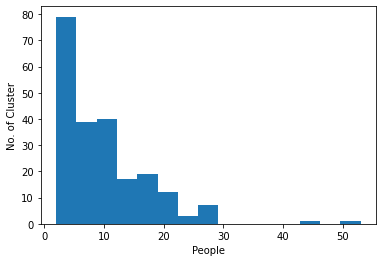

In [36]:
fig = plt.figure()
people_noOfCluster = fig.add_subplot(1,1,1)
people_noOfCluster.hist(f1_f5_unique_DF['people'],bins=15)
people_noOfCluster.set_xlabel('People')
people_noOfCluster.set_ylabel('No. of Cluster')
people_noOfCluster

### Insights Drawn For Task b:
Based on the diagram above, we observe that 
- Majority of the clusters recorded involved less than 5 people
- Very few cases of superspreader (i.e. less than 5 clusters involved more than 40 people).

## Task c) People Not Involved in Any Cluster
Identify all people who are not part of any cluster (those with no close contact).

In [38]:
peopleDF = pd.read_csv('../data/people.csv')
peopleDF

,index,name
0,PERSON_0000000000,Amy Berger
1,PERSON_0000000001,Michael Curry
2,PERSON_0000000002,Robert Ramirez
3,PERSON_0000000003,Derek Gonzalez
4,PERSON_0000000004,Gregory Fischer
...,...,...
995,PERSON_0000000995,Richard Kirk
996,PERSON_0000000996,Alexander Hernandez
997,PERSON_0000000997,Brandon Miller
998,PERSON_0000000998,Dennis Floyd


In [39]:
# merge Concat_f1_f5 with people.csv using people ID
people_f1_f5_merge = peopleDF.merge(Concat_f1_f5, left_on=['index'], right_on=['people'], how='outer')
POneg_NoCC_People_noNull = people_f1_f5_merge.fillna(0) 

In [40]:
POneg_NoCC_People = POneg_NoCC_People_noNull.query('trace_id == 0')

In [41]:
POneg_NoCC_Peopl_Final = POneg_NoCC_People[['index','name']].reset_index(drop=True)
POneg_NoCC_Peopl_Final

,index,name
0,PERSON_0000000001,Michael Curry
1,PERSON_0000000007,James Rodriguez
2,PERSON_0000000029,Kevin Hood
3,PERSON_0000000043,Douglas Brown
4,PERSON_0000000053,Jennifer Guzman
...,...,...
138,PERSON_0000000946,Diamond Jones
139,PERSON_0000000948,Sara Guerrero
140,PERSON_0000000966,Breanna Hill
141,PERSON_0000000976,Suzanne Gilbert


## Task d) Tracing Paths through a Specified Person
Design a function (```GetTracingPaths```) to find all tracing paths passing through a specified person ID in a given cluster.

In [42]:
df_f0_f1
df_f1_f2
df_f2_f3
df_f3_f4
df_f4_f5.head()

,trace_id,f4,f5
0,TRACE_PERSON_0000000379,PERSON_0000000245,PERSON_0000000331
1,TRACE_PERSON_0000000958,PERSON_0000000181,PERSON_0000000508
2,TRACE_PERSON_0000000576,PERSON_0000000604,PERSON_0000000238
3,TRACE_PERSON_0000000095,PERSON_0000000419,PERSON_0000000195
4,TRACE_PERSON_0000000892,PERSON_0000000931,PERSON_0000000593


In [43]:
df_f0_f2 = df_f0_f1.merge(df_f1_f2, on=['trace_id','f1'], how='outer')
df_f0_f3 = df_f0_f2.merge(df_f2_f3, on=['trace_id','f2'], how='outer')
df_f0_f4 = df_f0_f3.merge(df_f3_f4, on=['trace_id','f3'], how='outer')
df_f0_f5 = df_f0_f4.merge(df_f4_f5, on=['trace_id','f4'], how='outer')
df_f0_f5_sorted = df_f0_f5[['trace_id','f0','f1','f2','f3','f4','f5']].reset_index(drop=True)
df_f0_f5_sorted.shape

(2326, 7)

In [44]:
print(df_f0_f5_sorted.duplicated().sum())
df_f0_f5_sorted.duplicated().head(25)

220


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
dtype: bool

In [45]:
df_f0_f5_noDupli = df_f0_f5_sorted.drop_duplicates()
df_f0_f5_noDupli.shape

(2106, 7)

In [46]:
df_f0_f5_noDupli

,trace_id,f0,f1,f2,f3,f4,f5
0,TRACE_PERSON_0000000016,PERSON_0000000016,PERSON_0000000914,NaN,NaN,NaN,NaN
1,TRACE_PERSON_0000000016,PERSON_0000000016,PERSON_0000000711,NaN,NaN,NaN,NaN
2,TRACE_PERSON_0000000016,PERSON_0000000016,PERSON_0000000770,NaN,NaN,NaN,NaN
3,TRACE_PERSON_0000000016,PERSON_0000000016,PERSON_0000000338,NaN,NaN,NaN,NaN
4,TRACE_PERSON_0000000016,PERSON_0000000016,PERSON_0000000844,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2321,TRACE_PERSON_0000000706,PERSON_0000000706,PERSON_0000000522,PERSON_0000000127,NaN,NaN,NaN
2322,TRACE_PERSON_0000000975,PERSON_0000000975,PERSON_0000000311,NaN,NaN,NaN,NaN
2323,TRACE_PERSON_0000000037,PERSON_0000000037,PERSON_0000000577,PERSON_0000000394,PERSON_0000000263,PERSON_0000000516,NaN
2324,TRACE_PERSON_0000000037,PERSON_0000000037,PERSON_0000000577,PERSON_0000000394,PERSON_0000000263,PERSON_0000000446,NaN


In [54]:
def GetTracingPaths(personID, traceID):
    cluster = df_f0_f5_noDupli.loc[(df_f0_f5_noDupli['trace_id'] == traceID)]
    tracingPath = cluster[cluster.isin([personID]).any(axis=1)].reset_index(drop=True)
    
    # Create a copy to avoid the SettingWithCopyWarning
    tracingPath_final = tracingPath[['f0', 'f1', 'f2', 'f3', 'f4', 'f5']].copy()
    
    # Sort the DataFrame
    tracingPath_final.sort_values(by=['f0', 'f1', 'f2', 'f3'], inplace=True)
    
    return tracingPath_final.reset_index(drop=True)


In [55]:
GetTracingPaths('PERSON_0000000067','TRACE_PERSON_0000000379')

,f0,f1,f2,f3,f4,f5
0,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
1,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
2,PERSON_0000000379,PERSON_0000000218,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456
3,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
4,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000209
5,PERSON_0000000379,PERSON_0000000740,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,PERSON_0000000456


## Task e) Direct and Indirect Relationships
Design a function that checks if there’s a direct or indirect infection path between two people in a given trace ID.

In [62]:
import numpy as np

def GetInfectionRelationship(traceID, frm_ID, to_ID):
    FrmIndex_dict = {}
    ToIndex_dict = {}
    
    # Use copy explicitly
    cluster = df_f0_f5_noDupli.loc[(df_f0_f5_noDupli['trace_id'] == traceID)].copy()
    
    # Filter the cluster without chaining
    tracingPath = cluster[(cluster.isin([frm_ID]).any(axis=1)) & (cluster.isin([to_ID]).any(axis=1))].copy()
    
    # Process DataFrame with explicit assignments instead of inplace=True
    tracingPath_NoTraceID = tracingPath[['f0','f1','f2','f3','f4','f5']]
    tracingPath_NoTraceID = tracingPath_NoTraceID.sort_values(by=['f0','f1','f2','f3'])
    tracingPath_NoTraceID = tracingPath_NoTraceID.rename(columns={'f0': 0, 'f1': 1, 'f2': 2, 'f3': 3, 'f4': 4, 'f5': 5})
    
    # Use reset_index() and copy again to ensure it's not a view
    tracingPath_final = tracingPath_NoTraceID.reset_index(drop=True).copy()
    
    # Process for `frm_ID` and `to_ID`
    Frmresult = tracingPath_final.isin([frm_ID])
    FrmObj = Frmresult.any()
    FrmcolumnNames = list(FrmObj[FrmObj == True].index)
    for Fcol in FrmcolumnNames:
        Frows = list(Frmresult[Fcol][Frmresult[Fcol] == True].index)
        for Frow in Frows:
            FrmIndex_dict[Frow] = Fcol

    Toresult = tracingPath_final.isin([to_ID])
    ToObj = Toresult.any()
    TocolumnNames = list(ToObj[ToObj == True].index)
    for Tcol in TocolumnNames:
        Trows = list(Toresult[Tcol][Toresult[Tcol] == True].index)
        for Trow in Trows:
            ToIndex_dict[Trow] = Tcol
            
    # Update the values using `.loc[]` to avoid chained indexing
    for Fr, Fc in FrmIndex_dict.items():
        tracingPath_final.loc[Fr, list(range(Fc))] = np.nan
    
    for Tr, Tc in ToIndex_dict.items():
        tracingPath_final.loc[Tr, list(range(Tc + 1, tracingPath_final.shape[1]))] = np.nan
    
    return tracingPath_final


,0,1,2,3,4,5
0,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
1,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,NaN
2,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,NaN
3,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
4,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,NaN
5,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,NaN


In [63]:
GetInfectionRelationship('TRACE_PERSON_0000000379','PERSON_0000000054','PERSON_0000000067' )

,0,1,2,3,4,5
0,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
1,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,NaN
2,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,NaN
3,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000640,PERSON_0000000067
4,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,NaN
5,NaN,NaN,PERSON_0000000054,PERSON_0000000889,PERSON_0000000067,NaN


## Task f) Network Visualization of Tracing Paths
Visualise the tracing paths using NetworkX to show the network of people infected (directly or indirectly) within a specified cluster.

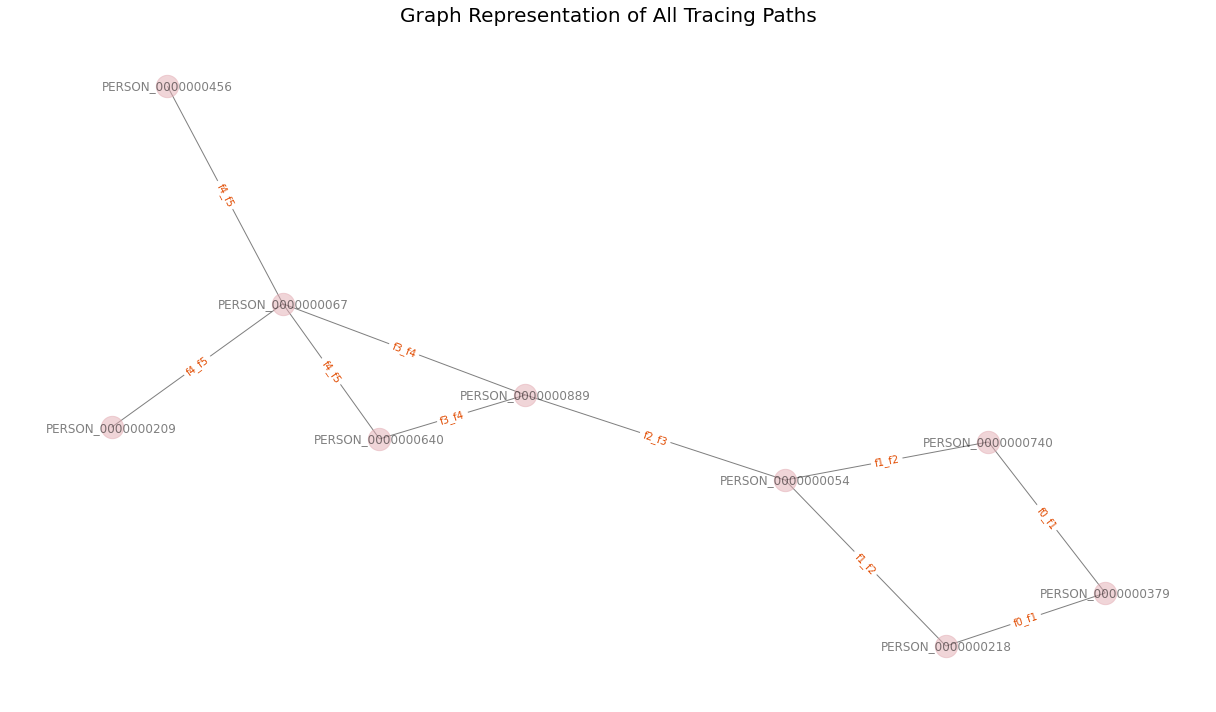

In [68]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

edgelist = GetTracingPaths('PERSON_0000000067','TRACE_PERSON_0000000379')

TracingPathGraph = nx.Graph()
for i, elrow in edgelist.iterrows():
    TracingPathGraph.add_edge(elrow[0], elrow[1], label='f0_f1')
    TracingPathGraph.add_edge(elrow[1], elrow[2], label='f1_f2')
    TracingPathGraph.add_edge(elrow[2], elrow[3], label='f2_f3')
    TracingPathGraph.add_edge(elrow[3], elrow[4], label='f3_f4')
    TracingPathGraph.add_edge(elrow[4], elrow[5], label='f4_f5')

pos = nx.spring_layout(TracingPathGraph, seed=2564973113)

mirrored_pos = {node: (-x, y) for node, (x, y) in pos.items()}

plt.figure(figsize=(17, 10))
plt.title('Graph Representation of All Tracing Paths', size=20)

edge_labels = nx.get_edge_attributes(TracingPathGraph, 'label')
nx.draw(TracingPathGraph, pos=mirrored_pos, node_size=500, node_color='#e3acb3', alpha=0.5, with_labels=True)
nx.draw_networkx_edge_labels(TracingPathGraph, pos=mirrored_pos, edge_labels=edge_labels, font_color='#e14b00')

plt.tight_layout()
plt.axis("off")
plt.show()
